## Feature Analysis

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
house_df = pd.read_csv('Housing.csv')

for i, ele in enumerate(df):
    print(f'{i}: {ele}')

0: price
1: area
2: bedrooms
3: bathrooms
4: stories
5: mainroad
6: guestroom
7: basement
8: hotwaterheating
9: airconditioning
10: parking
11: prefarea
12: furnishingstatus


In [40]:
house_df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [41]:
# Binary data encoding 
bi_mapping = {"no" : 0, "yes" : 1}
# 
house_df['hotwaterheating_encoded'] = house_df['hotwaterheating'].map(bi_mapping)
house_df['airconditioning_encoded'] = house_df['airconditioning'].map(bi_mapping)

# house_df['mainroad_ecoded'] = house_df['mainroad'].map(bi_mapping) 
# house_df['guestroom_ecoded'] = house_df['guestroom'].map(bi_mapping) 
# house_df['basement_ecoded'] = house_df['basement'].map(bi_mapping)
house_df['prefarea_ecoded'] = house_df['prefarea'].map(bi_mapping)

In [42]:
furnishingstatus_mapping = {"unfurnished" : 0, "semi-furnished" : 1, "furnished" : 2}

house_df['furnishingstatus_encoded'] = house_df['furnishingstatus'].map(furnishingstatus_mapping)

In [43]:
house_df = house_df.drop(columns=['hotwaterheating','airconditioning','furnishingstatus'])
house_df = house_df.drop(columns=['mainroad', 'guestroom', 'basement', 'prefarea'])
# house_df.head(5)

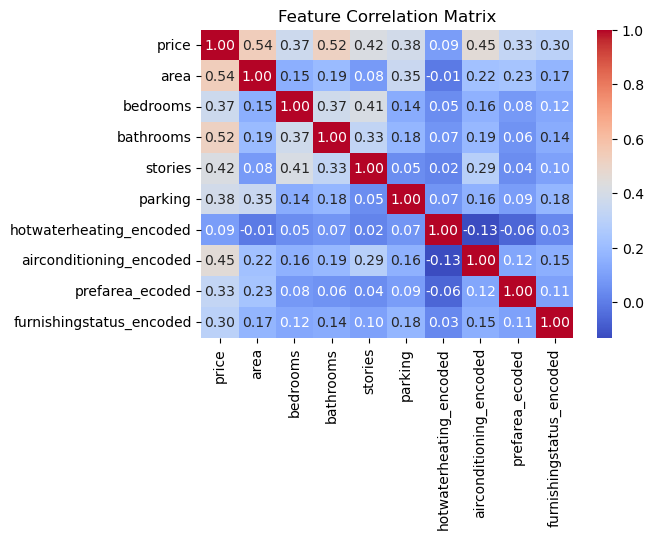

Highly correlated features with target: []


In [44]:
# Compute Pearson correlation
corr_matrix = house_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Selecting highly correlated features (absolute value > 0.7)
threshold = 0.7
high_corr_features = corr_matrix[abs(corr_matrix['price']) > threshold]['price'].index.tolist()
high_corr_features.remove('price')  # Remove the target itself
print("Highly correlated features with target:", high_corr_features)
